In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Note: In unsupervised Machine learning we only have input features and target variable is missing**

In [4]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

## K-Means Clustering Algorithm

In [5]:
from sklearn.cluster import KMeans

In [6]:
#step1: Initialise the algorithm class
model = KMeans(n_clusters=4) # n_clusters tells us, how many clusters or intial centroids we want 

In [7]:
#step2: train the model  -> calculating the distance -> assiging the clsuter -> recalculating the centroid again
model.fit(X)

KMeans(n_clusters=4)

In [11]:
cluster = model.predict(X)

In [13]:
df['cluster'] = cluster

In [14]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3
148,149,6.2,3.4,5.4,2.3,Iris-virginica,3


## Elbow method to find the optimal cluster size

In [16]:
from sklearn.metrics import silhouette_score

In [20]:
score_list = []
for i in range(2,8):
    model = KMeans(n_clusters=i)
    model.fit(X)
    score = silhouette_score(X,model.labels_)
    score_list.append(score)

Text(0.5, 0, 'Cluster size')

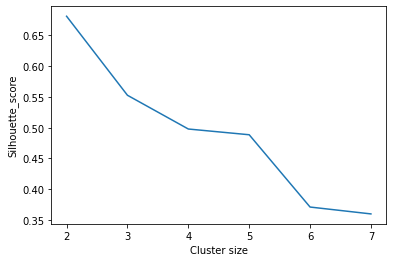

In [21]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(range(2,8),score_list)
ax.set_ylabel("Silhouette_score")
ax.set_xlabel("Cluster size")

## Aglomerative clustering

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

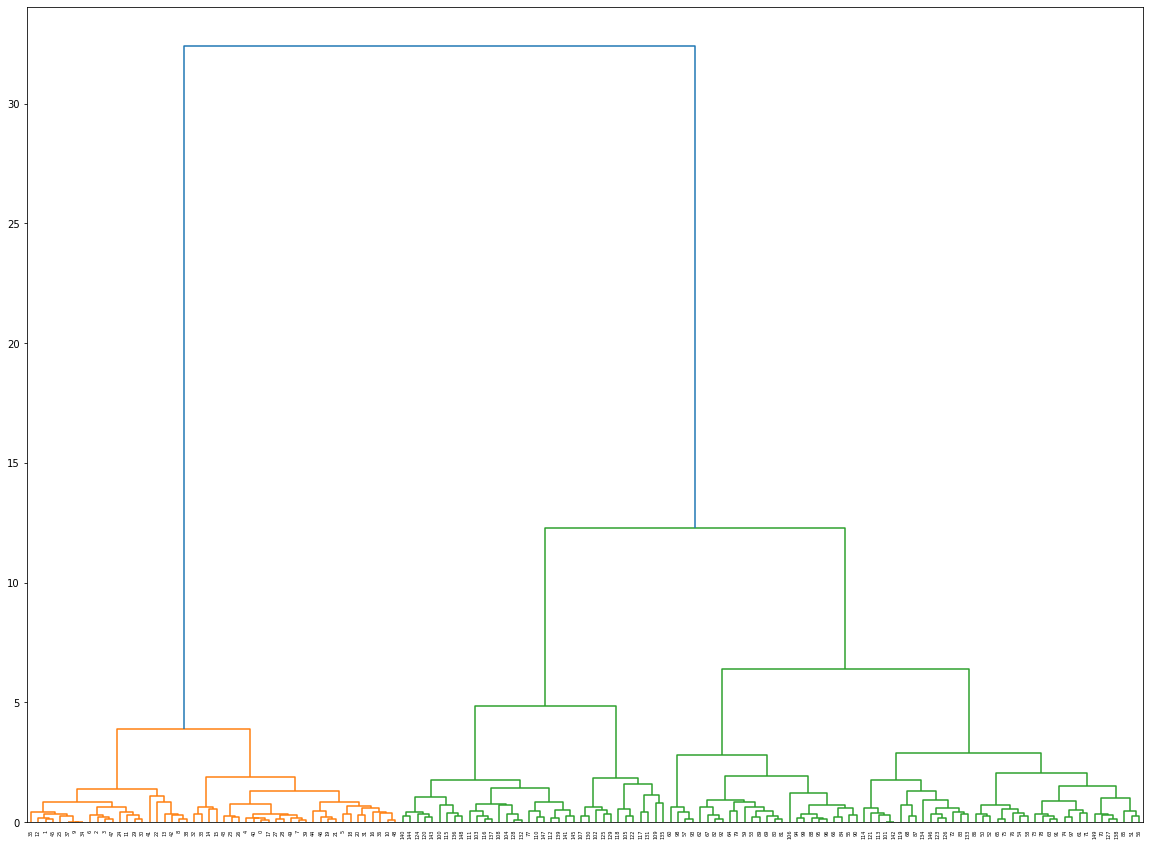

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =[20,15]
Z = linkage(X,'ward') # linkage -> distance from the centroid to the datapoint, "ward's method" for hierarchical clustering
dendrogram_plot = dendrogram(Z, truncate_mode = "level")
plt.show()